In [52]:
import matplotlib.pyplot as plt
import os

%matplotlib inline
#SMALL_SIZE = 10
#MEDIUM_SIZE = 12
#BIGGER_SIZE = 14

SMALL_SIZE = 14
MEDIUM_SIZE = 16
BIGGER_SIZE = 14
LEG_SIZE = 12

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=SMALL_SIZE)    # fontsize of the tick labels
#plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('legend', fontsize=LEG_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title


In [33]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pysindy as ps

dt = 0.01
n_steps = 300
end = dt*n_steps
#end = 40

def f(state, t):
    x0,x1= state
    #c = np.array([[-2,1],[1,1]])
    #z = c@state
    dx0 = -2*x0 + x1
    dx1 = x0 + x1
    
    dx0 = np.tanh(dx0)
    dx1 = np.tanh(dx1)
    return dx0,dx1

state0 = [0.1, 0.1]

#state0 = [0.4, 0.1]
#time_steps = np.arange(0.0, 40.0, dt)
#time_steps = np.linspace(0.0, end, n_steps)
train_time_steps = np.linspace(0.0, end, n_steps)

time_steps = np.linspace(0.0, 1, n_steps)

_x_train = odeint(f, state0, train_time_steps)
x_train = odeint(f, state0, time_steps)

In [31]:
#x_train = x_train + 0.05*np.random.randn(*x_train.shape)

In [32]:


model = ps.SINDy(
    #optimizer=ps.STLSQ(threshold=0.05),
    optimizer=ps.STLSQ(threshold=0.1),
    #optimizer=ps.STLSQ(threshold=0.1),
    feature_library=ps.PolynomialLibrary(degree=2),
)

model.fit(_x_train, t=dt)


#time_steps = np.linspace(0.0, 2*end, 2*n_steps)
#time_steps2 = np.linspace(0.0, 0.001*1000, 1000)
#x_sim = model.simulate(x_train[0], time_steps)
#x_sim = model.simulate(state0, time_steps)



SINDy(differentiation_method=FiniteDifference(),
      feature_library=PolynomialLibrary(), feature_names=['x0', 'x1'],
      optimizer=STLSQ())

In [21]:
model.print()

(x0)' = -1.968 x0 + 0.985 x1 + -0.054 x0^2
(x1)' = 1.466 x1 + 11.892 x0^2 + -5.994 x0 x1 + 0.085 x1^2


In [22]:

def f_sim(state, t):
    x0, x1 = state

    #dx0 = -2.418 *x0 + 1.106*x1
    #dx1 = 0.150*1 + -1.097*x0 + 1.268*x1 - 0.356*x1*x1

    #0.6, 0.1
    #dx0 = -2.231 *x0 + 1.117*x1 + 1.256*x0*x0 - 0.630*x0*x1
    #dx1 = 0.617*1 + 0.164*x1 + 0.212*x0*x0 +  -0.334*x0*x1


    dx0 = -1.968*x0 + 0.985*x1 + -0.054*x0*x0
    dx1 = 1.466*x1 + 11.892*x0*x0 + -5.994*x0*x1 + 0.085*x1*x1


    return dx0,dx1 

In [34]:

#state0 = [0.1,0.1 ]
#time_steps = np.linspace(0.0, 2*end, 2*n_steps)
#time_steps2 = np.linspace(0.0, 0.001*1000, 1000)
#x_sim = model.simulate(x_train[0], time_steps)
x_sim = model.simulate(state0, time_steps)

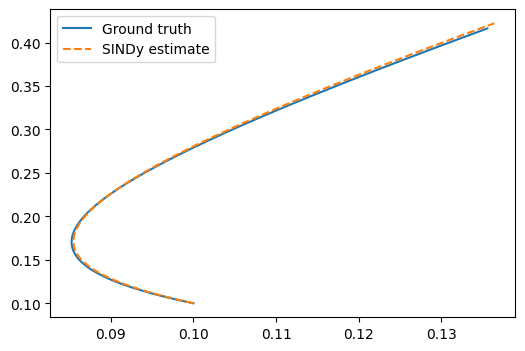

In [35]:
plt.figure(figsize=(6, 4))
plt.plot(x_train[:, 0], x_train[:, 1], label='Ground truth')
plt.plot(x_sim[:, 0], x_sim[:, 1], '--', label='SINDy estimate')
#plt.plot(x_train[0, 0], x_train[0, 2], "ko", label="Initial condition", markersize=8)
plt.legend()
plt.draw()
plt.show()

In [36]:
import matplotlib.pyplot as plt

In [53]:
t = np.linspace(0.05, 0.4,10)
t2 = np.linspace(0.053, 0.4,10)
#t = np.linspace(0., 1.,15)
x, y = np.meshgrid(t, t)
x2, y2 = np.meshgrid(t2, t2)

In [54]:
dx0,dx1 = f((x,y), 0)
sdx0,sdx1 = f_sim((x2,y2), 0)
#z.squeeze().shape

Text(0, 0.5, '$x_2$')

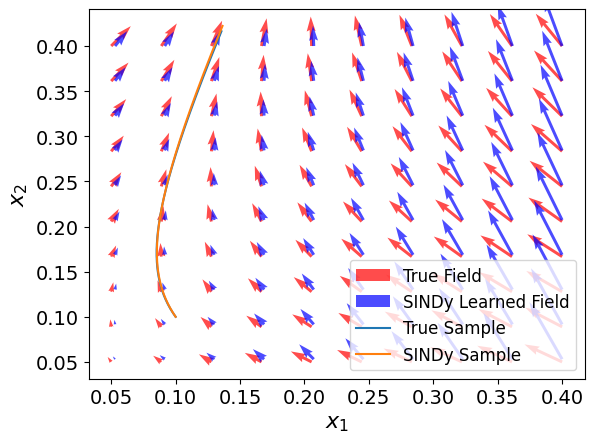

In [55]:
fig, ax = plt.subplots()
#N = np.sqrt(dx0**2 + dx1**2)
#color = np.sqrt(((dx0-n)/2)*2 + ((dx1-n)/2)*2)
#color = np.sqrt(((dx0*x+3)/2)*2 + ((dx1*y+3)/2)*2)
#ax.quiver(x, y, dx0/N, dx1/N, angles='xy', color='b')
#ax.quiver(x, y, dx0, dx1, angles='xy', color='r')
#ax.quiver(x, y, dx0, dx1, angles='xy', color='r', alpha=0.9, ls=':')
#ax.quiver(x, y, dx0, dx1, angles='xy', color='r', alpha=0.9, ls=':', label='Ground truth Field')
#ax.quiver(x, y, sdx0, sdx1, angles='xy', color='b', alpha=0.9, ls=':', label='Learned Field')

ax.quiver(x, y, dx0, dx1, angles='xy', color='r', alpha=0.7, label='True Field')#, ls=':')
ax.quiver(x2, y2, sdx0, sdx1, angles='xy', color='b', alpha=0.7, label='SINDy Learned Field')#, ls=':')

ax.plot(x_train[:, 0], x_train[:, 1], label='True Sample')
ax.plot(x_sim[:, 0], x_sim[:, 1], label='SINDy Sample')

#ax.plot(x_train2[:, 0], x_train2[:, 1], label='T Sample 2')
#ax.plot(x_sim2[:, 0], x_sim2[:, 1], label='Learned Sample 2')
#plt.legend(loc='upper right')
plt.legend(loc='lower right')
plt.xlabel('$x_1$')
plt.ylabel('$x_2$')
#ax.quiver(x, y, dx0, dx1)1

In [56]:
fig.savefig(os.path.join('img','tanh2','sindy_tanh_traj_.pdf'), bbox_inches='tight')

In [ ]:
def f(state, t):
    x, y, z = state
    #return sigma * (y - x), x * (rho - z) - y, x * y - beta * z
    #return sigma * (y - x), x * (rho - z) - y, x * y - beta * z
    dx = -0.0879 + 1.6870*x
    dy = -0.8512 + 1.0273*x -0.5622*z -0.0339*x*y +0.1025*y*y
    dz = 0.9278 + 0.0479*x + 1.2808*z
    #return -0.0879, x * (rho - z) - y, x * y - beta * z
    dx = (dx - 1.6824*x)
    dy = (dy - 1.9404*y)
    dz = (dz - 1.3089*z)

    dx = dx/0.8365
    dy = dy/0.9703
    dz = dz/0.3601

    return dx,dy,dz

state0 = [1.0, 1.0, 1.0]
#time_steps = np.arange(0.0, 40.0, dt)
time_steps = np.linspace(0, 2000*0.01, 2000)
self.time_steps = time_steps

x_sim = odeint(f, state0, time_steps)
#return x_sim

In [6]:
x_list = L.run_once()

In [7]:
len(x_list)

4

In [9]:
x_list[0].shape

torch.Size([10, 50, 3])

In [11]:
import torch

In [12]:
X = torch.cat(x_list, dim=0)

In [13]:
X.shape

torch.Size([40, 50, 3])

In [14]:
Xp = X.reshape(40*50,3)

In [15]:
Xp.shape

torch.Size([2000, 3])

In [18]:
Xp = Xp.detach().cpu().numpy()

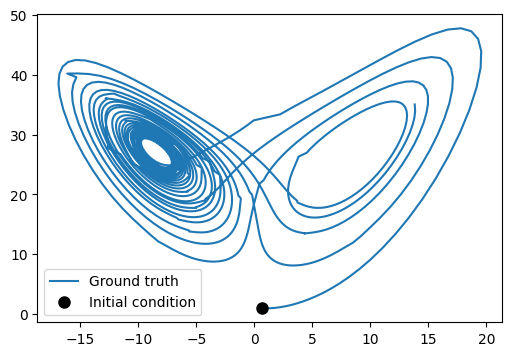

In [19]:
plt.figure(figsize=(6, 4))
plt.plot(Xp[:, 0], Xp[:, 2], label='Ground truth')
#plt.plot(x_sim[:, 0], x_sim[:, 2], '--', label='SINDy estimate')
plt.plot(Xp[0, 0], Xp[0, 2], "ko", label="Initial condition", markersize=8)
plt.legend()
plt.draw()
plt.show()